# Computational Intelligence
## Assignment - 1

### GitHub Link : https://github.com/syedjameel/CI-1

written by : Jameel Ahmed Syed
email : j.syed@innopolis.university

## Note: This notebook contains the report aswell


<hr>

# Task-3

You are given the following optimization problem:

$$
\begin{aligned}
\min _{x_{1}, x_{2}} & \frac{1}{2} x_{1}^{2}+4 x_{2}^{2}-32 x_{2}+60 \\
\text { s.t. } & x_{1}+x_{2} \leq 6 \\
& x_{1}+2 x_{2} \leq 8 \\
& x_{1} \geq 0 \\
& x_{2} \geq 0 \\
& x_{2} \leq 9
\end{aligned}
$$

#### Task-3.1

Rearrange the problem (2) in the following form

$$
\begin{array}{cl}
\min _{\mathbf{x}} & f(\mathbf{x})=\frac{1}{2} \mathbf{x}^{T} H \mathbf{x}+c \mathbf{x}+c_{0} \\
\text { s.t. } & A \mathbf{x} \leq b
\end{array}
$$


### Solution 3.1

We need to rewrite the quadratic equation in the proper QP form:
\begin{equation}
\begin{aligned}
\min_{x} \quad & \frac{1}{2}x^{T}Hx + c^Tx + \mathbf{c}_{0} \\
\textrm{s.t.} \quad & Ax \leq b
\end{aligned}
\end{equation}
where
\begin{equation}
\begin{aligned}
x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \quad
H = \begin{bmatrix} h_{11} & h_{12} \\ h_{21} & h_{22} \end{bmatrix} \quad
c^T = \begin{bmatrix} c_1 & c_2 \end{bmatrix} \quad
\mathbf{c}_{0} = 60
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
\frac{1}{2}x^{T}Hx + c^Tx = & \frac{1}{2}
\begin{bmatrix} x_1 & x_2 \end{bmatrix}
\begin{bmatrix} h_{11} & h_{12} \\ h_{21} & h_{22} \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}+
\begin{bmatrix} c_1 & c_2 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}=\\
& \frac{1}{2}(h_{11}x_1^2+h_{22}x_2^2 +(h_{12}+h_{21})x_1x_2)+c_1x_1+c_2x_2+\mathbf{c}_{0}
\end{aligned}
\end{equation}


\begin{equation}
\begin{aligned}
H = \begin{bmatrix} 1 & 0 \\ 0 & 8 \end{bmatrix} \\
c^T =
\begin{bmatrix} 0 & -32 \end{bmatrix}
\end{aligned}
\end{equation}

To find matrix $A$ and $b$ first we need to multiply some inequalities by $-1$:
\begin{equation}
\begin{aligned}
& x_{1}+x_{2} \leq 6 \\
& x_{1}+2 x_{2} \leq 8 \\
& -x_{1} \leq 0 \\
& -x_{2} \leq 0 \\
& x_{2} \leq 9
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
A =
\begin{bmatrix} 1 & 1 \\ 1 & 2\\ -1 & 0\\ 0 & -1 \\ 0 & 1 \end{bmatrix} \\
b=\begin{bmatrix} 6\\ 8\\ 0\\ 0\\9 \end{bmatrix}
\end{aligned}
\end{equation}

#### Task-3.2

Use CVXPY to solve both (2) and (3).

### Solution 3.2

### 1. Solving the problem (2) Representation
As shown below in the code

In [62]:
import cvxpy as cp
import numpy as np

size_x = 2

x1 = cp.Variable()
x2 = cp.Variable()

obj = cp.Minimize((1/2)*x1**2 + 4*x2**2 -32*x2 +60)
contraints = [x1 + x2 <= 6,
              x1 + 2*x2 <= 8,
              -x1 <= 0,
              -x2 <= 0,
              x2 <= 9]

prob = cp.Problem(obj, contraints)
prob.solve()
# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x1.value, x2.value)




The optimal value is -4.0
A solution x is
-1.944102834068013e-24 3.9999999999999996


<hr>

### 2. Solving the problem (3) Representation
As shown below in the code

In [63]:


size_x = 2

H = np.array([[1, 0], [0, 8]])
c = np.array([[0],[-32]])
A = np.array([[1, 1], [1, 2], [-1, 0], [0, -1], [0, 1]])
b = np.array([[6], [8], [0], [0], [9]]).reshape(5,)
c0 = 60


x = cp.Variable(size_x)
prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(x, H) + c.T @ x),
                 [A @ x <= b])
prob.solve()
# Print result.
print("\nThe optimal value is", prob.value + c0)
print("A solution x is")
print(x.value)



The optimal value is -4.0
A solution x is
[-1.94410283e-24  4.00000000e+00]


Therefore, when $x_1 = 0.000$ and $x_2 = 4.000$ the quadratic function is minimized (-64 + 60 = -4, don’t forget the constant 60).

#### In both the representations the solutions are the same

<hr>

#### Task 3.3

Visualize the domain of the function, its cost function and its solution.

### Solution 3.3

### Visualize the domain of the function

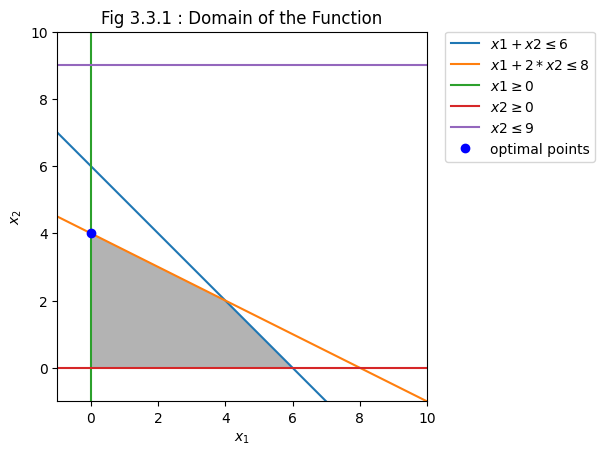

In [66]:
import matplotlib.pyplot as plt

# plot the feasible region
d = np.linspace(0, 6, 600)
x1, x2 = np.meshgrid(d,d)
plt.imshow(((x1 + x2 <= 6) & (x1 + 2*x2 <= 8) & (-x1 <= 0) & (-x2 <= 0) & (x2 <= 9)).astype(int),
            extent=(x1.min(),x1.max(),x2.min(),x2.max()),origin="lower", cmap="Greys", alpha = 0.3);

# plot the lines defining the constraints
xx = np.linspace(0, 5, 200)

# x1 >= 1
x1 = np.linspace(-1, 10, 100)

# Make plot
plt.title("Fig 3.3.1 : Domain of the Function")
plt.plot(x1, 6 - x1, label=r'$x1+x2\leq6$')
plt.plot(x1, (8 -x1)/2, label=r'$x1+2*x2\leq8$')
plt.plot(np.zeros_like(x1), x1, label=r'$x1\geq0$')
plt.plot(x1, np.zeros_like(x1), label=r'$x2\geq0$')
plt.plot(x1, 9*np.ones_like(x1), label=r'$x2\leq9$')
plt.plot(x.value[0], x.value[1], 'bo', label='optimal points')
plt.xlim(-1,10)
plt.ylim(-1,10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

### Visualize the Cost of the Function

-4.0


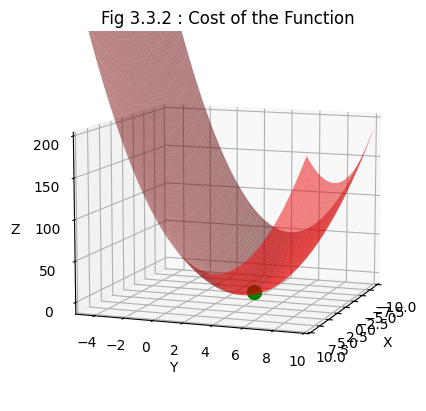

In [67]:

xx = np.linspace(-10,10,100)
yy = np.linspace(-10,10,100)

X,Y = np.meshgrid(xx,yy)
Z = (1/2)*(X**2) + 4 * (Y**2) - (32 * Y) + c0
optimal_z = (1/2)*(x.value[0]**2) + 4 * (x.value[1]**2) - (32 * x.value[1]) + c0
print(optimal_z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('Fig 3.3.2 : Cost of the Function')

ax.plot_surface(X, Y, Z, color='r', alpha=0.5)
ax.scatter([x.value[0]], [x.value[1]], [optimal_z], s=100, marker="o", color='green', label='optimal point')

# set the limits of the plot
ax.set_xlim(-10, 10)
ax.set_ylim(-5, 10)
ax.set_zlim(-10, 200)

# set the labels of the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(10, 20)

# show the plot
plt.show()